# Dataset EDA

In [1]:
import pandas as pd

df_raw = pd.read_csv('../../data/03_correlation_data/presence_dataset/20210331124802/presences.csv')
df = df_raw.copy()
df_raw.head(3)

,thread_id,product_name
0,e9molz,110
1,e9d9z1,Ibis Ripmo AF
2,e9as86,Airstream 2


### Normalize `product_name`

- Note:
    - Casefolding is a more aggressive version of lower() that is set up to make many of the more unique unicode characters more comparable. It is another form of normalizing text that may initially appear to be very different, but it takes characters of many different languages into account. [stack](https://stackoverflow.com/questions/45745661/lower-vs-casefold-in-string-matching-and-converting-to-lowercase)

In [2]:
df['product_name'] = df['product_name'].str.casefold()
df['product_name'] = df['product_name'].str.strip()
df.head(3)

,thread_id,product_name
0,e9molz,110
1,e9d9z1,ibis ripmo af
2,e9as86,airstream 2


In [3]:
def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)
df['name_with_digits'] = df['product_name'].apply(has_numbers)
df.head(3)

,thread_id,product_name,name_with_digits
0,e9molz,110,True
1,e9d9z1,ibis ripmo af,False
2,e9as86,airstream 2,True


In [4]:
print(f"Original len: {len(df)}")
df = df[df["name_with_digits"] == False]
df = df.drop("name_with_digits", 1)
print(f"Entries from products with not digits in the name: {len(df)}")

Original len: 183053
Entries from products with not digits in the name: 124736


In [5]:
df_prod = df.groupby('product_name').agg(['count','nunique']).reset_index()
df_prod.columns = list(map('_'.join, df_prod.columns.values))
df_prod = df_prod.sort_values('thread_id_count', ascending = False)
df_prod.head(3)

,product_name_,thread_id_count,thread_id_nunique
10470,mtb,2224,1711
19352,trek,1453,1026
18972,tiagra,1242,820


/home/pistocop/github/garrascobike-core/.env/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'thread_id_count'}>,
        <AxesSubplot:title={'center':'thread_id_nunique'}>]], dtype=object)

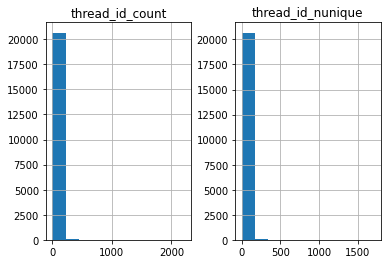

In [7]:
df_prod.hist()